Tarea 3 Algoritmos de Aprendizaje Supervisado
Dataset Regresión Logística
grupo-21


In [8]:
#cargar las librerias necesarias
import pandas as pd #maneja y analisa estructura de datos.
import numpy as np # calculo numerico y el analisis de datos
import seaborn as sns # creacion graficos estadisticos
import matplotlib.pyplot as plt # crea graficos en 2 dimensiones

# librerias para implementar modelo de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [9]:
# Lectura de datos y se cargan en la variable datos
Dataset = pd.read_csv('./heart_cleveland_upload.csv')

In [10]:
# se realiza la lectura de los datos para el analisis exploratorio
Dataset.head(50)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [11]:
#Describir los datos
Dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificacion de datos faltantes y atipicos')

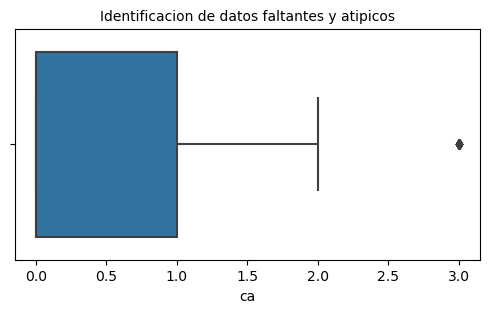

In [12]:
# Identificacion de valores faltantes y atipicos
plt.figure(figsize=(6, 3))  #figura de 6*3
sns.boxplot(x=Dataset['ca'])
plt.title('Identificacion de datos faltantes y atipicos', fontsize=10 )

Text(0.5, 1.0, 'Identificacion de datos faltantes y atipicos')

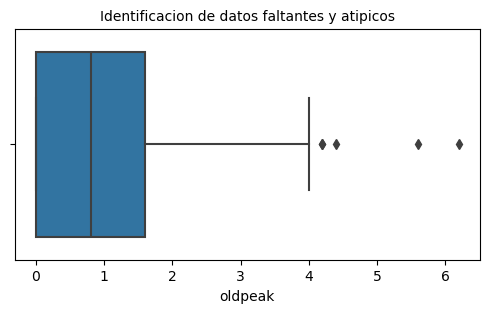

In [13]:
# Identificacion de valores faltantes y atipicos
plt.figure(figsize=(6, 3))  #figura de 6*3
sns.boxplot(x=Dataset['oldpeak'])
plt.title('Identificacion de datos faltantes y atipicos', fontsize=10 )

Proceso de datos, tratando valores faltantes y transformarlos si se necesita

In [14]:
#revision de datos faltamtes
print("cantidad de registro con 0 en glucemia en ayunas,fbs, 1 verdadero, o falso: ", Dataset['fbs'].isin([0]).sum())
print("cantidad de registro con 0 en la angina por ejercicios, 1 si, 0 no: ", Dataset['exang'].isin([0]).sum())
print("cantidad de registro con 0 en depresion del ST inducida por el ejercicio en relación con el reposo: ", Dataset['oldpeak'].isin([0]).sum())
print("cantidad de registro con 0 en la condicion, 0 sin enfermedad, 1 con enfermedad: ", Dataset['condition'].isin([0]).sum())

cantidad de registro con 0 en glucemia en ayunas,fbs, 1 verdadero, o falso:  254
cantidad de registro con 0 en la angina por ejercicios, 1 si, 0 no:  200
cantidad de registro con 0 en depresion del ST inducida por el ejercicio en relación con el reposo:  96
cantidad de registro con 0 en la condicion, 0 sin enfermedad, 1 con enfermedad:  160


In [ ]:
# reemplazar los ceros con el valor medio de la columna
Dataset['condition'] = Dataset['condition'].replace(0,Dataset[0,'condition'].mean())

In [ ]:
# se revisa nuevamente los datos faltantes
print("cantidad de registro con 0 en la condicion, 0 sin enfermedad, 1 con enfermedad: ", Dataset['condition'].isin([0]).sum())


hallando datoso atipicos

Text(0.5, 1.0, 'Identificacion de datos faltantes y atipicos')

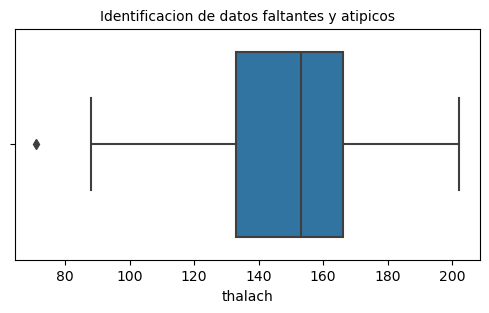

In [15]:
plt.figure(figsize=(6, 3))  #figura de 6*3
sns.boxplot(x=Dataset['thalach'])
plt.title('Identificacion de datos faltantes y atipicos', fontsize=10 )

In [16]:
# conteo de datos atipicos
nivel_minimo = 80
nivel_maximo = 200
Total_Atipicos = ((Dataset['thalach']<nivel_minimo) | (Dataset['thalach']>nivel_maximo)).sum()
print("El total de los datos atipicos es {}".format(Total_Atipicos))

El total de los datos atipicos es 2


In [17]:
# filtra datos atipicos
Dataset=Dataset[ (Dataset['thalach']<nivel_maximo)&(Dataset['thalach']>nivel_minimo) ]

In [18]:
#valida si se removieron los datos atipicos
Total_Atipicos = ((Dataset['thalach']<nivel_minimo) | (Dataset['thalach']>nivel_maximo)).sum()
print("El total de los datos atipicos es {}".format(Total_Atipicos))


El total de los datos atipicos es 0


In [19]:
#revision de tipo de datos y datos faltantes
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 295 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        295 non-null    int64  
 1   sex        295 non-null    int64  
 2   cp         295 non-null    int64  
 3   trestbps   295 non-null    int64  
 4   chol       295 non-null    int64  
 5   fbs        295 non-null    int64  
 6   restecg    295 non-null    int64  
 7   thalach    295 non-null    int64  
 8   exang      295 non-null    int64  
 9   oldpeak    295 non-null    float64
 10  slope      295 non-null    int64  
 11  ca         295 non-null    int64  
 12  thal       295 non-null    int64  
 13  condition  295 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 34.6 KB


# 3.caracteristicas ma relevantes para entrenar el modelo

In [20]:
Dataset['condition'].value_counts()

condition
0    159
1    136
Name: count, dtype: int64

In [21]:
Dataset[['condition']].head(40)

,condition
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,1
8,0
9,0


# 4.  dividir el dataset en train y test para evaluar el modelo

In [28]:
#porcentaje de datos para entrenamiento(train) = 75%, y para prueba (test) = 25%
# se crean variables x y Y para almacenar la informacion del entrenamiento 

x = Dataset.drop('condition', axis = 1) # se cargan los datos de train sin lof datos de la columna condition
y = Dataset['condition'] # Se cargan os datos de train con los datos de la columna condition

#La funcion train_test_split crea una division de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify= y, random_state= 0)


In [29]:
print (x_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
232   57    0   3       128   303    0        2      159      0      0.0   
53    48    1   1       130   245    0        2      180      0      0.2   
102   58    1   2       140   211    1        2      165      0      0.0   
189   62    0   3       138   294    1        0      106      0      1.9   
169   66    1   3       160   228    0        2      138      0      2.3   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
77    68    0   2       120   211    0        2      115      0      1.5   
168   66    1   3       112   212    0        2      132      1      0.1   
154   37    0   2       120   215    0        0      170      0      0.0   
153   37    1   2       130   250    0        0      187      0      3.5   
260   51    1   3       140   298    0        0      122      1      4.2   

     slope  ca  thal  
232      0   1     0  
53       1   0     0  
102      0   0    

In [30]:
print (y_train)

232    0
53     0
102    0
189    1
169    0
      ..
77     0
168    1
154    0
153    0
260    1
Name: condition, Length: 221, dtype: int64


# 5. Entrenar el modelo configurando los diferentes hiperparametros

In [34]:
# Se construye el modelo de regresion logistica
modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificacion y regresion
modelo_regresion .fit (x_train, y_train)

# crea el modelo de prediccion
prediction = modelo_regresion.predict(x_test)# predict nos predice los valores a partir del conjunto de datos de validacion


In [31]:
print (y_test)

112    0
252    1
241    1
163    1
285    0
      ..
172    0
136    1
138    0
221    1
33     1
Name: condition, Length: 74, dtype: int64


In [35]:
print (prediction)

[0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0
 0 0 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0]


# 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [36]:
# Desempeño del modelo de regresion
print(classification_report(y_test, prediction)) # compara lo que deberia ser vs lo que se predijo

              precision    recall  f1-score   support

           0       0.90      0.88      0.89        40
           1       0.86      0.88      0.87        34

    accuracy                           0.88        74
   macro avg       0.88      0.88      0.88        74
weighted avg       0.88      0.88      0.88        74



# Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

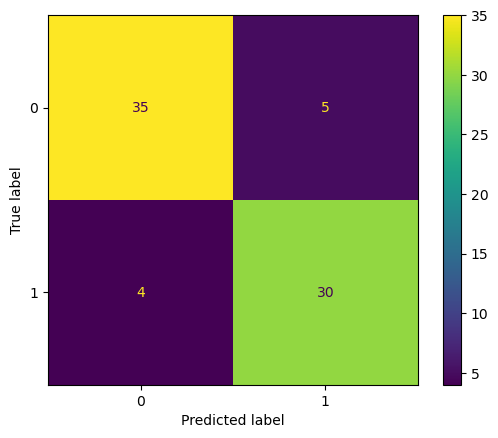

In [37]:
# matrix de confusion
cm = confusion_matrix(y_test, prediction)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

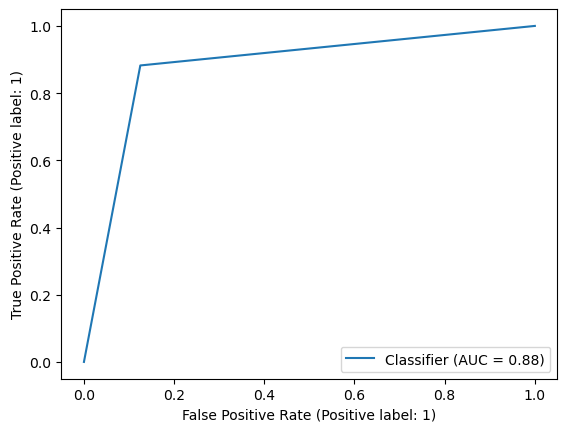

In [40]:
# curva de precison del modelo
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, prediction)
plt.show()

8. # interpretar, analizar y documetar los resultados
Del desempeño del modelo se puede describir:
condition : 0 sin enfermedad, 1 con enfermedad. 
Precisión: Precisión mide la proporción de predicciones positivas verdaderas entre todas las predicciones positivas realizadas por el modelo. Aquí la precisión para la clase "condition" es 0,86, lo que significa que el 86% de los predichos como enfermos por el modelo eran en realidad enfermos.

Recall: Mide la proporción de predicciones positivas verdaderas entre todas las instancias positivas reales en el conjunto de datos. Aquí el Recall para la clase "condition" es 0,88, lo que indica que el modelo identificó correctamente al 88% de todos los enfermos.

F1 Score: Es la media armónica de precisión y recuperación. Proporciona una puntuación única que equilibra la Precisión y Recall. Aquí la puntuación F1 para la clase "count" es 0,87, lo que indica un equilibrio entre precisión y recuerdo.

De la Matriz de Confusión podemos interpretar:

Verdaderos negativos: el recuento de observaciones que un clasificador predijo correctamente como falso 35

Verdaderos positivos: el recuento de observaciones que un clasificador predijo correctamente como Verdadero 30

Falsos positivos: el recuento de observaciones que un clasificador predijo incorrectamente como Verdaderas 5

Falsos negativos: el recuento de observaciones que un clasificador predijo incorrectamente como falso 4

De la curva de precisión del modelo se puede interpretar:

El AUC es 0,88 lo que significa que el 88 % de las predicciones del clasificador son correctas en todos los umbrales de clasificación.